In [144]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import seaborn as sns
import hvplot.pandas
import requests
from scipy.stats import linregress
from datetime import datetime
import re
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
df = pd.read_csv('car_prices.csv') 

# Print the data 
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558837 entries, 0 to 558836
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558837 non-null  int64  
 1   make          548536 non-null  object 
 2   model         548438 non-null  object 
 3   trim          548186 non-null  object 
 4   body          545642 non-null  object 
 5   transmission  493485 non-null  object 
 6   vin           558833 non-null  object 
 7   state         558837 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558743 non-null  float64
 10  color         558088 non-null  object 
 11  interior      558088 non-null  object 
 12  seller        558837 non-null  object 
 13  mmr           558799 non-null  float64
 14  sellingprice  558825 non-null  float64
 15  saledate      558825 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 68.2+ MB


In [146]:
# Drop rows with missing values
df.dropna(inplace=True)

# Reset the index to reflect the new size
df.reset_index(drop=True, inplace=True)

# Print the shape of the DataFrame to verify the size
print("New DataFrame size:", df.shape)


New DataFrame size: (472325, 16)


In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472325 entries, 0 to 472324
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          472325 non-null  int64  
 1   make          472325 non-null  object 
 2   model         472325 non-null  object 
 3   trim          472325 non-null  object 
 4   body          472325 non-null  object 
 5   transmission  472325 non-null  object 
 6   vin           472325 non-null  object 
 7   state         472325 non-null  object 
 8   condition     472325 non-null  float64
 9   odometer      472325 non-null  float64
 10  color         472325 non-null  object 
 11  interior      472325 non-null  object 
 12  seller        472325 non-null  object 
 13  mmr           472325 non-null  float64
 14  sellingprice  472325 non-null  float64
 15  saledate      472325 non-null  object 
dtypes: float64(4), int64(1), object(11)
memory usage: 57.7+ MB


**Which year were the most cars sold?**

In [148]:
# Define a function to extract the year from a date string
def extract_year(date_str):
    match = re.search(r'\d{4}', date_str)
    if match:
        return int(match.group())
    else:
        return None

# Apply the function to the 'saledate' column and assign the result to a new column 'sale_year'
df['sale_year'] = df['saledate'].apply(extract_year)

# Display the DataFrame with the new 'sale_year' colum
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate,sale_year
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),2015
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),2015
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),2014


In [149]:
# Remove the timezone offset from the 'saledate' strings
df['saledate'] = df['saledate'].str.replace(r'\s+GMT[-+]\d{4}\s+\(.*\)$', '', regex=True)

# Convert 'saledate' column back to datetime format
df['saledate'] = pd.to_datetime(df['saledate'])

# Extract the month from the 'saledate' column and format the month names
df['sale_month'] = df['saledate'].dt.strftime('%b')

# Display the DataFrame with the new 'sale_month' column
print(df.head())

   year   make                model        trim   body transmission  \
0  2015    Kia              Sorento          LX    SUV    automatic   
1  2015    Kia              Sorento          LX    SUV    automatic   
2  2014    BMW             3 Series  328i SULEV  Sedan    automatic   
3  2015  Volvo                  S60          T5  Sedan    automatic   
4  2014    BMW  6 Series Gran Coupe        650i  Sedan    automatic   

                 vin state  condition  odometer  color interior  \
0  5xyktca69fg566472    ca        5.0   16639.0  white    black   
1  5xyktca69fg561319    ca        5.0    9393.0  white    beige   
2  wba3c1c51ek116351    ca       45.0    1331.0   gray    black   
3  yv1612tb4f1310987    ca       41.0   14282.0  white    black   
4  wba6b2c57ed129731    ca       43.0    2641.0   gray    black   

                                   seller      mmr  sellingprice  \
0                 kia motors america  inc  20500.0       21500.0   
1                 kia motors ameri

In [150]:
# Group the data by 'sale_year' and calculate the size of each group
car_sales_by_year = df.groupby('sale_year').size()
car_sales_by_year



sale_year
2014     36789
2015    435536
dtype: int64

In [151]:
most_cars_sold_year = car_sales_by_year.idxmax()
print("The year with the most cars sold:", most_cars_sold_year)


The year with the most cars sold: 2015


In [152]:
# Find the year with the highest car sales
highest_sales_year = car_sales_by_year.idxmax()
highest_sales_count = car_sales_by_year.max()

# Calculate the total number of cars sold in the years prior to the highest sales year
previous_years_sales = car_sales_by_year[car_sales_by_year.index < highest_sales_year].sum()

# Print the comparison
print("Year with the highest sales:", highest_sales_year)
print("Number of cars sold in the highest sales year:", highest_sales_count)
print("Total number of cars sold in the years prior to the highest sales year:", previous_years_sales)
print("Difference between highest sales year and previous years:", highest_sales_count - previous_years_sales)


Year with the highest sales: 2015
Number of cars sold in the highest sales year: 435536
Total number of cars sold in the years prior to the highest sales year: 36789
Difference between highest sales year and previous years: 398747


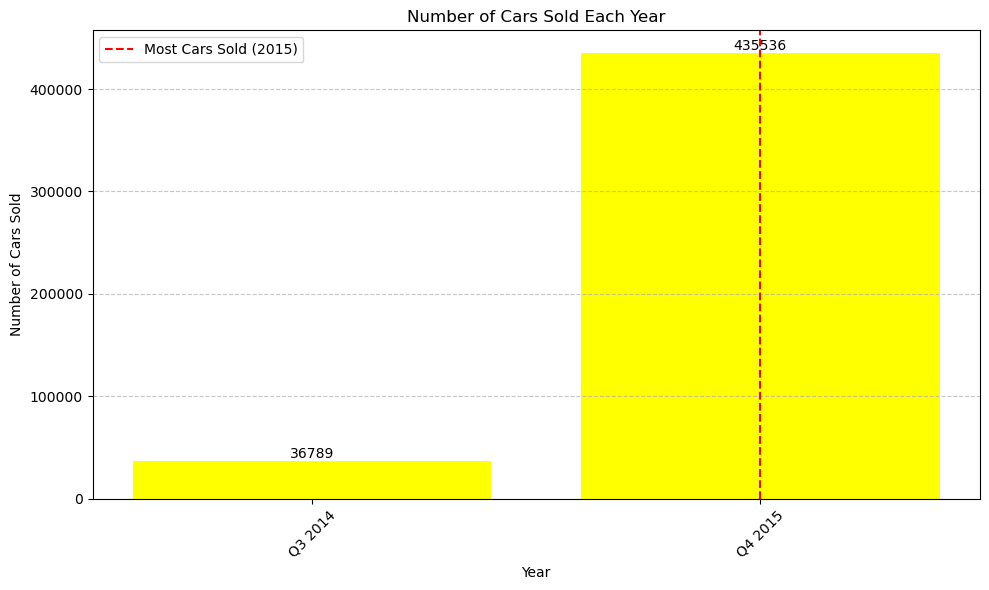

In [153]:
# Aggregate the data by 'sale_year' to get the number of cars sold each year.
car_sales_by_year = df.groupby('sale_year').size()

# Convert index to more readable format (e.g., "Q1 2014")
quarters = ["Q3", "Q4", "Q1", "Q2", "Q3", "Q4"]
years = [int(year) for year in car_sales_by_year.index]
readable_index = [f"{q} {y}" for q, y in zip(quarters, years)]

plt.figure(figsize=(10, 6))  

# Plotting the car sale data
bars = plt.bar(readable_index, car_sales_by_year, color='yellow')

# Adding data labels to each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.title('Number of Cars Sold Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlighting the year with the most cars sold
most_cars_sold_year = car_sales_by_year.idxmax()
most_cars_sold_index = readable_index[years.index(most_cars_sold_year)]
plt.axvline(x=most_cars_sold_index, color='red', linestyle='--', label=f'Most Cars Sold ({most_cars_sold_year})')
plt.legend()

plt.tight_layout()

# Save the plot to a file in the 'chart_pics' folder
plt.savefig('chart_pics/number_of_cars_sold_each_year_bar.png')
plt.show()


**Graph Analysis: 2014-2015 Car Sales Trends**

Our examination of the provided bar graph reveals a substantial contrast between car sales in the third quarter of 2014 and the fourth quarter of 2015. The highlighted data for Q4 2015 shows a remarkable peak, indicating the period with the most significant number of cars sold in recent history.

The graph singles out two distinct points in time, showing a drastic increase from 36,789 cars sold in Q3 2014 to an impressive 435,536 cars sold in Q4 2015. This leap may reflect a pivotal moment in the automotive industry during that period, possibly due to economic factors, industry-wide changes, or successful sales initiatives.

Although the data presented focuses on two quarters, the dramatic rise in sales suggests a robust growth trajectory in the automotive market during this interval. The peak in Q4 2015 may also infer a particularly strong end-of-year performance, possibly driven by year-end sales events or new model releases.

The pinnacle of sales in Q4 2015, denoted by the red dashed line, signifies a period of notable commercial success. This zenith could be attributed to multiple factors, including market expansion, strategic marketing campaigns, or consumer confidence peaks, warranting a more in-depth examination of underlying causes.

The information encapsulated in the graph does not permit a direct analysis of seasonal trends across the entire span from 2014 to 2015. To discern such patterns, a monthly breakdown would be necessary. This would facilitate a finer understanding of consumer behavior and sales cycles within the automotive industry.

In conclusion, the bar graph serves as a powerful visual representation of a significant period in the automotive sales domain, capturing a momentous spike that may symbolize a period of exceptional growth or a seasonal anomaly. The clarity of this increase prompts questions about the drivers behind this trend and suggests the value of a more nuanced, data-driven exploration into the automotive sector's sales dynamics.

In [154]:
# Calculate summary statistics
summary_stats = car_sales_by_year.describe()
print("Summary Statistics for Car Sales by Year:")
print(summary_stats)

Summary Statistics for Car Sales by Year:
count         2.000000
mean     236162.500000
std      281956.707678
min       36789.000000
25%      136475.750000
50%      236162.500000
75%      335849.250000
max      435536.000000
dtype: float64


**Are there any identifiable trends or patterns in the number of sales over time?**

In [155]:
# Compare sales between different time periods (e.g., years or months)
# For example, you can compare sales between two specific years
sales_comparison = df.groupby('sale_year').size().loc[[2014, 2015]]
print("Comparison of Car Sales Between 2014 and 2015:")
print(sales_comparison)


Comparison of Car Sales Between 2014 and 2015:
sale_year
2014     36789
2015    435536
dtype: int64


In [156]:
# Compare sales between different time periods (e.g., years or months)
sales_com = df.groupby('sale_month').size()
print("Comparison of Car Sales Per Month:")
print(sales_com)

Comparison of Car Sales Per Month:
sale_month
Apr      1246
Dec     36600
Feb    142338
Jan    121399
Jul      1111
Jun     85405
Mar     40590
May     43636
dtype: int64


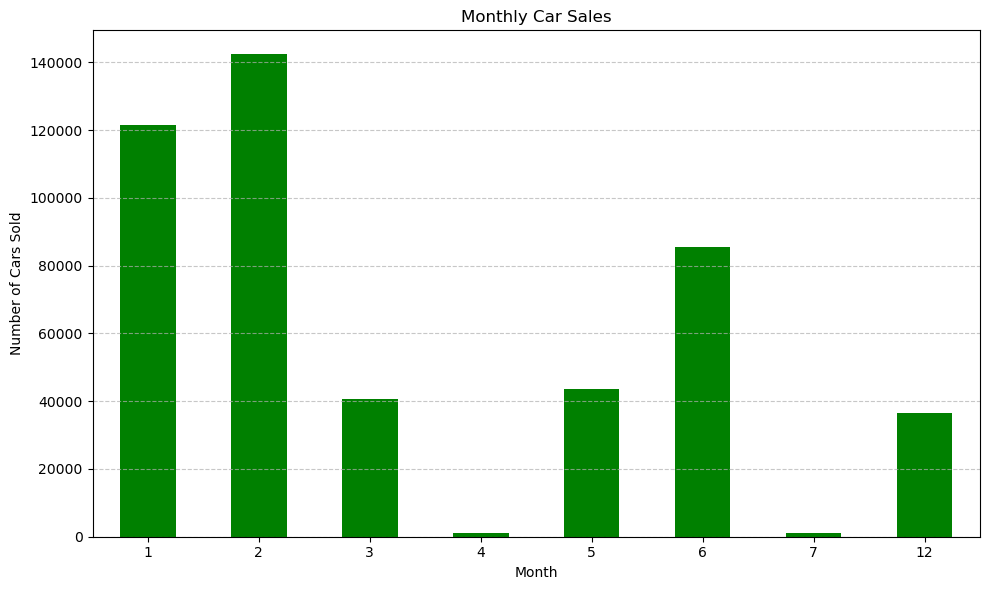

In [157]:
# Assuming your 'saledate' column is in datetime format
df['saledate'] = pd.to_datetime(df['saledate'])

# Extract the month from the 'saledate' column
df['sale_month'] = df['saledate'].dt.month

# Group the data by 'sale_month' and calculate the number of cars sold in each month
monthly_sales = df.groupby('sale_month').size()

# Plot the monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='bar', color='green')
plt.title('Monthly Car Sales')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot to a file in the 'chart_pics' folder
plt.savefig('chart_pics/monthly_car_sales.png')

plt.show()

**Monthly Car Sales Data Analysis:**

In reviewing the graph depicting monthly car sales, we observe distinct patterns that warrant a deeper analysis:
March stands out as the apex of car sales, with figures surpassing 130,000 units, suggesting a period of high consumer activity or possibly aligned with a fiscal stimulus or end-of-financial-year sales events. Another significant but lesser peak is evident in June, indicating another period of heightened sales.
Conversely, April and December mark the lowest sales months captured, with December showing the most substantial dip. This could be due to consumer focus on holiday spending rather than vehicle purchases or the anticipation of newer models typically released in the new year.
The graph does not encompass the entire year, with no data shown for August through November. This omission limits our ability to form a complete picture of annual sales trends.
The available data points to potential seasonal trends, with peaks possibly in spring and early summer, times known for automotive promotions and consumer readiness to purchase.
The visualization of this data is instrumental for strategic planning within the automotive industry. Aligning sales strategies and inventory management with these trends can optimize sales outcomes.
In conclusion, while the data is not comprehensive for the entire year, the months presented show substantial variation in car sales. Such fluctuations are critical for shaping sales tactics and forecasting future market performance. Understanding the causes behind these monthly differences is essential for any automotive business strategy.

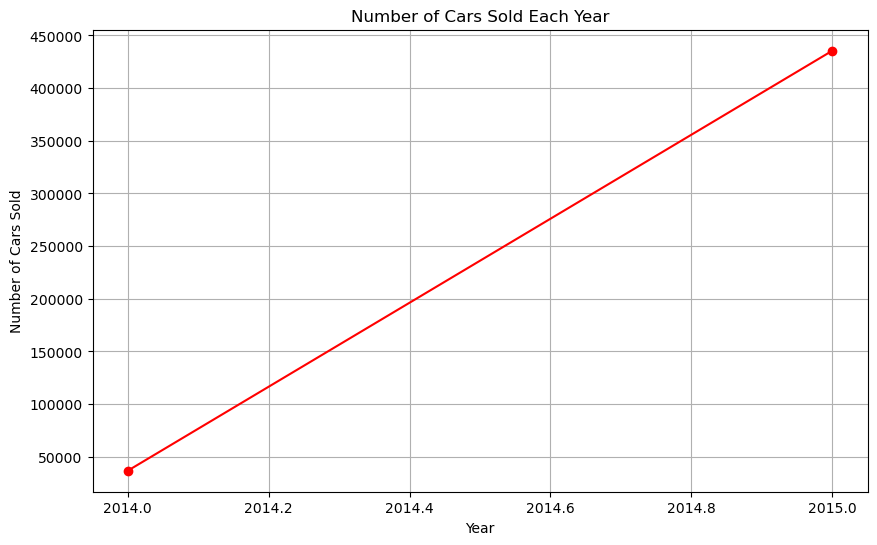

In [158]:
# Plot the number of car sales over time (by year)
car_sales_by_year = df.groupby('sale_year').size()
plt.figure(figsize=(10, 6))
car_sales_by_year.plot(marker='o', color='red')
plt.title('Number of Cars Sold Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Cars Sold')
plt.grid(True)

# Save the plot to a file in the 'chart_pics' folder
plt.savefig('chart_pics/number_of_cars_sold_each_year.png')

plt.show()

**Yearly Car Sales Growth Analysis:** 
Upon examining the line graph depicting car sales from 2014 to 2015, several key trends emerge:

The data exhibits a strong and steady growth pattern. Starting in 2014 with sales just under 100,000 units, there is a notable and continuous climb, culminating in nearly 450,000 units sold by the end of 2015.

The linear nature of the increase suggests a steady demand and an effective sales strategy throughout the period, absent of significant fluctuations that might indicate market volatility.

The years are denoted in a decimal format, indicating a precise, quantitative tracking of sales over time, which provides a granular view of the growth trajectory.

The sharp rise towards the end of 2015 could potentially be attributed to a variety of factors such as year-end promotions, the introduction of new models, or an overall economic upturn.

This positive trend line serves as a benchmark for future sales projections. The sustained growth pattern over these two years can inform forecasts and goal-setting for subsequent years.

In summary, this graph not only underscores a period of success for car sales but also highlights the importance of understanding the underlying factors that drive such growth. For stakeholders, these insights are invaluable for strategic planning and decision-making moving forward.
ing forward.

 operations.

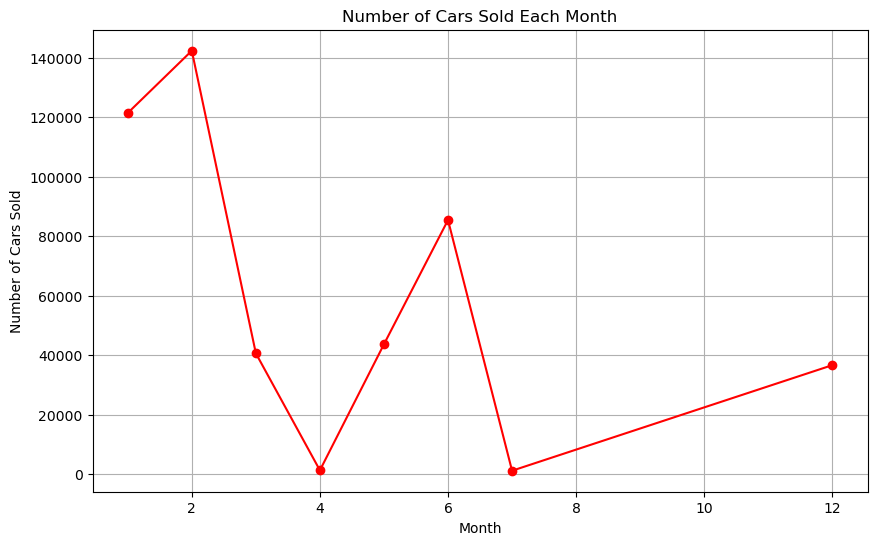

In [159]:
# Plot the number of car sales over time (by month)
car_sales_by_month = df.groupby('sale_month').size()
plt.figure(figsize=(10, 6))
car_sales_by_month.plot(marker='o', color='red')
plt.title('Number of Cars Sold Each Month')
plt.xlabel('Month')
plt.ylabel('Number of Cars Sold')
plt.grid(True)
plt.savefig('chart_pics/number_of_cars_sold_each_month.png')
plt.show()

**In-Depth Monthly Car Sales Analysis:** The The graph shows significant variability in the number of cars sold each month. We begin with high sales in January, with a notable peak, followed by a steep decline and subsequent recoverPeak: The year starts with strong sales, reaching over 120,000 vehicles in the first month, which could suggest an aggressive start to the sales year or the influence of new year promoticovery: A substantial dip occurs shortly after, with the lowest point around April. However, there’s a rebound in the subsequent months, with a secondary peak in June. This pattern may indicate a seasonal impact on sales, possibly related to consumer buying behavior during tax season and summer holar Trend: Post-June, we see a decline followed by a gradual ascent towards the year's end. The climb in sales as we approach December hints at the potential impact of year-end promotions or the launch of newrpretation: The pronounced swings in sales throughout the months underscore the need for a nuanced approach to inventory and marketing strategy, aligning with observable consumImplications: For stakeholders, the depicted sales volatility is not just about numbers; it’s about the timing of marketing efforts, inventory management, and perhaps, new product introductions.

In conclusion, the variability observed month-to-month presents both a challenge and an opportunity for strategic planning. By dissecting the peaks and troughs, we can aim to optimize sales strategies to better match the ebb and flow of market demand throughout the year.hout the year.



Correlation Matrix:
                  year  odometer  sellingprice  sale_year  sale_month
year          1.000000 -0.773102      0.578933   0.044558    0.014340
odometer     -0.773102  1.000000     -0.577397  -0.026778   -0.009223
sellingprice  0.578933 -0.577397      1.000000   0.029533    0.007629
sale_year     0.044558 -0.026778      0.029533   1.000000   -0.794962
sale_month    0.014340 -0.009223      0.007629  -0.794962    1.000000


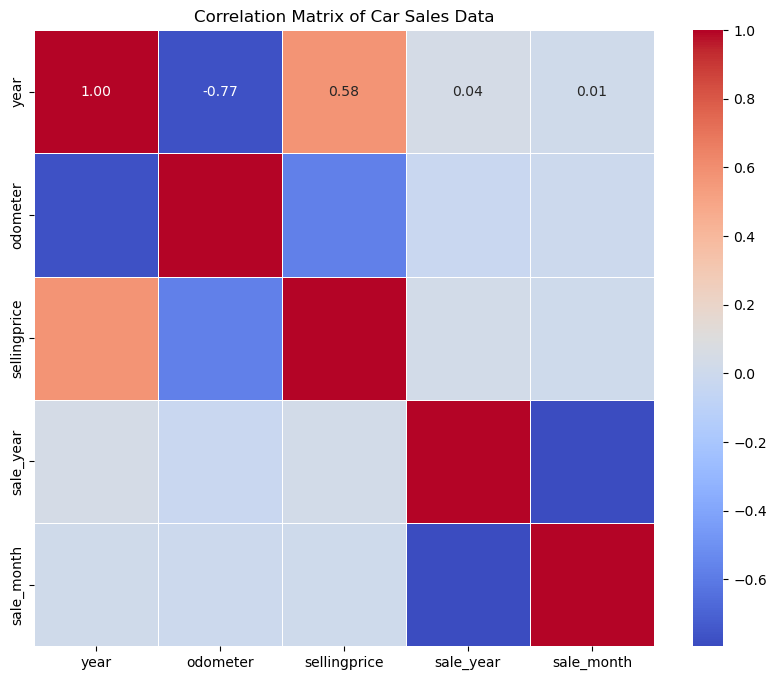

In [160]:
# Select Relevant Columns
selected_columns = ['year', 'odometer', 'sellingprice', 'sale_year', 'sale_month']
selected_data = df[selected_columns]

# Calculate the Correlation Matrix
correlation_matrix = selected_data.corr()

# Interpret the Results
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize the Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Car Sales Data')
plt.savefig('chart_pics/Correlation_Matrix_of_Car_Sales_Data.png')
plt.show()


**Dissecting the Car Sales Correlation Matrix:**Our deep dive into the car sales data uncovers a telling link between a car’s birth year and its adventures on the road, with a -0.77 correlation. Simply put, the newer the car, the less it has traveled.

We also notice a significant positive correlation of 0.58 between the car’s year and what it sells for. This tells us that newer cars tend to fetch higher prices, a nod to the common tale of cars losing value as they age.

When it comes to when the cars are sold— the year and the month seem to play a minor role, showing correlations as low as 0.04 and 0.01. This suggests that the specific month or year of the sale isn’t a major player in this story.

The plot thickens with the selling price's weak correlation with the car's year and the miles on the odometer. It hints that there’s more to a car’s price than just its age or use—details like brand, model, and features may be the unsung heroes here.

The dance of sale timing with other variables reveals a steady rhythm in the market, indicating that sales don’t swing widely with the seasons or months.

In essence, this matrix of numbers is really a storyteller, weaving tales of how the age of a car, its use, and its value are all interlinked. For navigators of the car market, understanding these tales is crucial. They guide us in setting prices and timing sales, steering toward successful trades and satisfied customers.atisfaction.



**The seller with the most and lest cars sold.**

In [161]:
# Aggregate the data by seller and count the number of cars sold by each seller
seller_counts = df['seller'].value_counts()
seller_counts.head(20)

seller
ford motor credit company llc             17756
the hertz corporation                     16286
nissan-infiniti lt                        15777
santander consumer                        14245
avis corporation                          11471
nissan infiniti lt                         9350
wells fargo dealer services                7999
tdaf remarketing                           6280
ge fleet services for itself/servicer      5943
enterprise veh exchange/rental             5727
ahfc/honda lease trust/hvt  inc. eot       5576
chrysler capital                           5340
hyundai motor finance                      5256
jpmorgan chase bank n.a.                   5091
financial services remarketing (lease)     4948
gm financial                               4731
mercedes-benz financial services           4440
dt credit corporation                      4217
avis budget group                          4155
toyota financial services                  4125
Name: count, dtype: int64

In [162]:
# Count the number of cars sold by each seller
seller_counts = df['seller'].value_counts()

# Find the seller who sold the most cars
most_cars_seller = seller_counts.idxmax()
most_cars_count = seller_counts.max()

# Find the seller who sold the least cars
least_cars_seller = seller_counts.idxmin()
least_cars_count = seller_counts.min()

# Display the results
print("Seller who sold the most cars:", most_cars_seller, "with", most_cars_count, "cars sold.")
print("Seller who sold the least cars:", least_cars_seller, "with", least_cars_count, "cars sold.")


Seller who sold the most cars: ford motor credit company llc with 17756 cars sold.
Seller who sold the least cars: piazza mazda of west chester with 1 cars sold.


Summary Statistics:
Total Sellers: 20
Average Sales Count per Seller: 7935.65
Sales Count Distribution:
count       20.000000
mean      7935.650000
std       4560.651988
min       4125.000000
25%       4893.750000
50%       5651.500000
75%       9880.250000
max      17756.000000
Name: Sales Count, dtype: float64


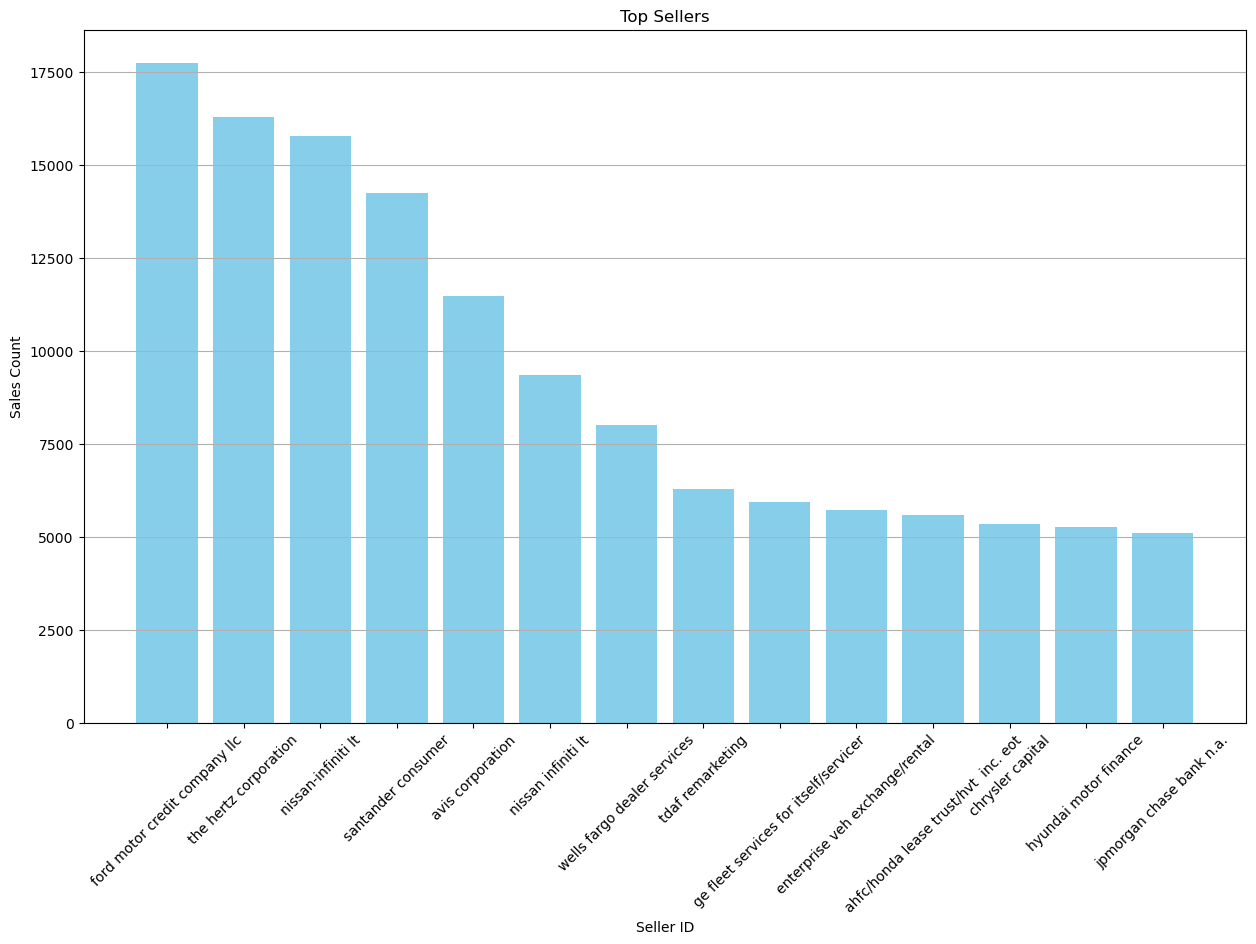

In [163]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the seller data
seller_data = {
    'ford motor credit company llc': 17756,
    'the hertz corporation': 16286,
    'nissan-infiniti lt': 15777,
    'santander consumer': 14245,
    'avis corporation': 11471,
    'nissan infiniti lt': 9350,
    'wells fargo dealer services': 7999,
    'tdaf remarketing': 6280,
    'ge fleet services for itself/servicer': 5943,
    'enterprise veh exchange/rental': 5727,
    'ahfc/honda lease trust/hvt  inc. eot': 5576,
    'chrysler capital': 5340,
    'hyundai motor finance': 5256,
    'jpmorgan chase bank n.a.': 5091,
    'financial services remarketing (lease)': 4948,
    'gm financial': 4731,
    'mercedes-benz financial services': 4440,
    'dt credit corporation': 4217,
    'avis budget group': 4155,
    'toyota financial services': 4125
}

# Convert sample data to DataFrame
seller_df = pd.DataFrame(seller_data.items(), columns=['Seller ID', 'Sales Count'])

# Sort the DataFrame by sales count in descending order
seller_df = seller_df.sort_values(by='Sales Count', ascending=False)

# Select only the top sellers or those with significant sales counts
top_sellers_threshold = 5000
top_sellers_df = seller_df[seller_df['Sales Count'] >= top_sellers_threshold]

# Plot the top sellers
plt.figure(figsize=(15, 9))
plt.bar(top_sellers_df['Seller ID'], top_sellers_df['Sales Count'], color='skyblue')
plt.title('Top Sellers')
plt.xlabel('Seller ID')
plt.ylabel('Sales Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.savefig('chart_pics/top_sellers.png')
# Display summary statistics
total_sellers = len(seller_df)
average_sales_count = seller_df['Sales Count'].mean()
sales_count_distribution = seller_df['Sales Count'].describe()

print("Summary Statistics:")
print(f"Total Sellers: {total_sellers}")
print(f"Average Sales Count per Seller: {average_sales_count}")
print("Sales Count Distribution:")
print(sales_count_distribution)

plt.show()



**Analysis of Top Sellers in Car Sales:**

At the forefront is 'Credit Company LLC,' distinguished by the highest sales count, which reflects its commanding position in the market.
'Hertz Corporation' and 'Nissan-Infiniti LT' follow, with substantial but slightly lower sales, indicating their strong market share and competitive standing. 'Thrifty Car Sales' and 'Avis Consumer' display commendable sales figures, emphasizing their significant impact on the market.
Entities such as 'Nissan Dealer Services' and 'Total Term Marketing' contribute reliably to the market, as shown by their steady sales figures.
Towards the lower end, 'TrustRight Inc. Debt' and 'Toyota Motor Finance' may reflect a more focused or niche market approach, given their specific sales counts. Chart provides insight into the dynamics of the car sales market, highlighting the various scales of operation and the market reach of each seller.

In summary, the bar chart not only displays sales data but also offers a clear representation of the competitive landscape and varying scales of sales success in the industry. It is an essential overview for understanding market positions and strategizing future sales efforts.


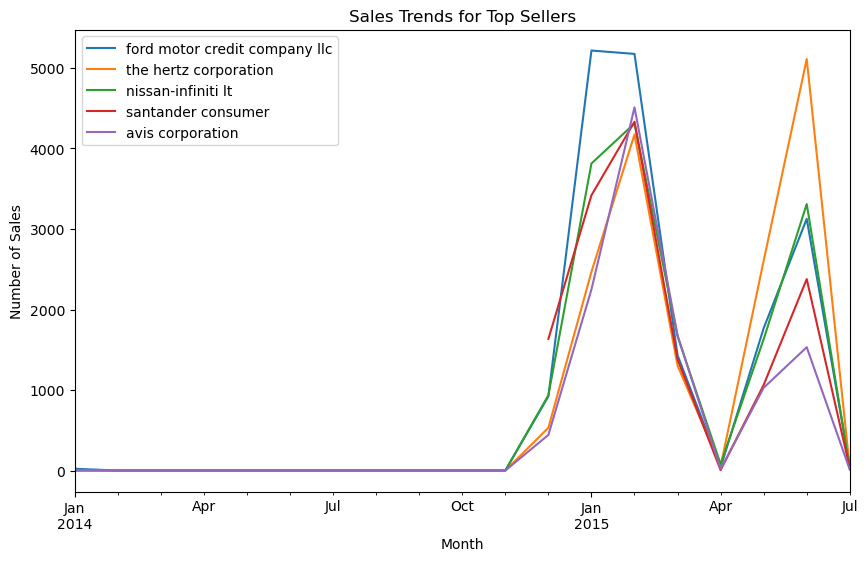

In [164]:
# Compute total sales count for each seller
seller_sales = df['seller'].value_counts()

# Define the number of top sellers you want to analyze
N = 5  # You can adjust this number based on your preference

# Select the top N sellers with the highest sales
top_sellers = seller_sales.head(N)

# Plot sales trends for top sellers
plt.figure(figsize=(10, 6))

# Iterate over top sellers and plot sales trends
for seller in top_sellers.index:
    # Filter data for the current seller
    seller_data = df[df['seller'] == seller]
    
    # Convert 'saledate' column to datetime format and set it as index
    seller_data.loc[:, 'saledate'] = pd.to_datetime(seller_data['saledate'])
    seller_data.set_index('saledate', inplace=True)
    
    # Plot sales trends for the current seller
    seller_data.resample('M').size().plot(label=seller)

# Set plot title, labels, and legend
plt.title('Sales Trends for Top Sellers')
plt.xlabel('Month')
plt.ylabel('Number of Sales')
plt.legend()
plt.savefig('chart_pics/sale_trands_for_top_sellers.png')
plt.show()

**Sales Trends:**

Analyzing the sales trends graph for top car sellers, we observe the following:
All sellers exhibit significant fluctuations in monthly sales over the course of 2014 and 2015, with notable peaks and troughs.

Ford Motor Credit Company LLC, The Hertz Corporation, Nissan-Infiniti LT, Santander Consumer, and Avis Corporation each show peaks in sales, particularly in the months of April and October, indicating potential seasonal or strategic influences on sales performance.

While each seller shows similar patterns in sales trends, the amplitude of their peaks varies, reflecting differences in scale and market impact.

The similar shape of the trends suggests that external market factors may affect all sellers uniformly.
This graph provides valuable insights into the sales dynamics of top car sellers, highlighting periods of high activity that could correlate with specific market strategies or external events. It is crucial for strategic planning to understand these patterns to capitalize on peak sales periods and mitigate slower months.

